# MNIST digits classification dataset (Coursera lab)


# 1. import libraries

In [55]:
import numpy as np
import  matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras


# 2. Load and inspect the data

In [75]:
# load the data 
(x_train , y_train ), (x_test , y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

# the shape of data 
print('Training data')
print( x_train.shape)
print( y_train.shape,' \n')
print('Testing data')
print(x_test.shape)
print( y_test.shape)


Training data
(60000, 28, 28)
(60000,)  

Testing data
(10000, 28, 28)
(10000,)


In [76]:
# labels of y
np.unique(y_train) 


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# 3. Normalize pixel values

In [77]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# 4. Defining your callback

In [78]:

# GRADED CLASS: myCallback
### START CODE HERE

# Remember to inherit from the correct class
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
                print("\nReached 99% accuracy so cancelling training!") 
                
                # Stop training once the above condition is met
                self.model.stop_training = True

### END CODE HERE

# 5. Create and train your model


In [79]:
# GRADED FUNCTION: train_mnist
def train_mnist(x_train, y_train):

    ### START CODE HERE
    
    # Instantiate the callback class
    callbacks = myCallback()
    
    # Define the model
    model = tf.keras.models.Sequential([ 
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
        tf.keras.layers.Dense(units=10 ,  activation=tf.nn.softmax)
    ]) 

    # Compile the model
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 
    
    # Fit the model for 10 epochs adding the callbacks
    # and save the training history
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

    ### END CODE HERE

    return history , model

In [80]:
history , model = train_mnist(x_train , y_train)

Epoch 1/10
1875/1875 [==============================] - 60s 31ms/step - loss: 0.2017 - accuracy: 0.94013s - loss: 0.2079 - ac - ETA: 3s - ETA: 2s - loss: 0.2050 - ac - ETA: 1s - l
Epoch 2/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0817 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0515 - accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0376 - accuracy: 0.98792s - loss: 0.0377 - accura - ETA: 2s - loss: 0.0379  - ETA: 1s - loss: - ETA: 0s - loss:
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0284 - accuracy: 0.9904 - ETA: 29s - loss: 0.0279 - accur - ETA: 28s - loss: 0.0278 - accur - ETA: 27s - loss: 0.0278 - accuracy: 0.99 - ETA: 27s - - ETA: 25s - loss: 0.0283 -  - ETA - ETA: 21s - loss: 
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0284 - accuracy: 0.9904


# 6. Visualization

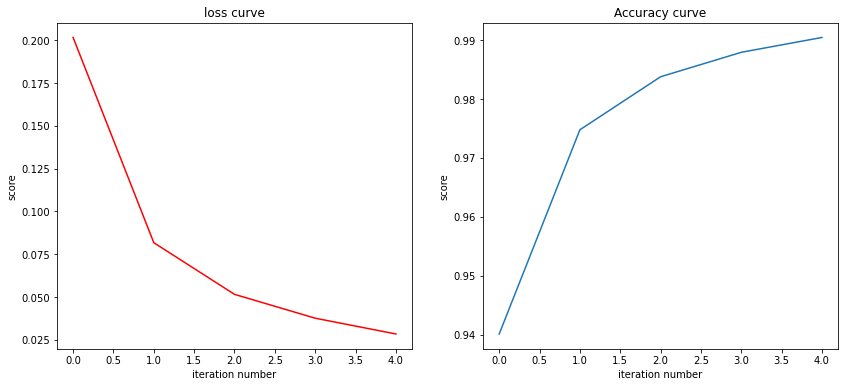

In [81]:
# Training track
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'] ,'r')
plt.title('loss curve')
plt.xlabel('iteration number')
plt.ylabel('score')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.title('Accuracy curve')
plt.xlabel('iteration number')
plt.ylabel('score')
plt.show()

# 7. Evaluate the model  on the testset

In [82]:
# Evaluate model
model.evaluate(x_test , y_test)

313/313 [==============================] - 9s 24ms/step - loss: 0.0669 - accuracy: 0.9826 2s - loss: 0.0766 - accuracy:  - ETA: 0s - loss: 0.0664 - accuracy - ETA: 0s - loss: 0.0670 - accuracy


[0.06688152998685837, 0.9825999736785889]

In [92]:
# Test prediction
y_pred = model.predict(x_test)
y_pred[12]

array([9.2851343e-12, 8.4843943e-10, 4.1353268e-10, 9.4415645e-07,
       7.7183598e-05, 1.7936270e-07, 9.4392300e-13, 4.6350938e-06,
       4.6893524e-07, 9.9991655e-01], dtype=float32)

Text(0.5, 1.0, '9')

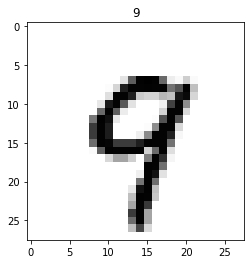

In [94]:
plt.imshow(x_test[12] , cmap='Greys')
plt.title(y_test[12])

                                                       THE END 